SAMPLE USECASE OF THE MOBILITY DATASET FOR A WEEK

In [2]:
from pyspainmobility import Mobility, Zones
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# getting 1 week of mobility data. In this case, we download the data from March 10 to March 16 
mobility_data = Mobility(version=2, zones='lua', start_date='2024-10-14', end_date='2024-10-20')
# and we extract the OD matrices 
mobility_data.get_od_data()

Downloading: https://movilidad-opendata.mitma.es/estudios_basicos/por-GAU/viajes/ficheros-diarios/2024-10/20241014_Viajes_GAU.csv.gz
Saved 97395065 bytes to C:\Users\carlo\data\20241014_Viajes_GAU_v2.csv.gz
Downloading: https://movilidad-opendata.mitma.es/estudios_basicos/por-GAU/viajes/ficheros-diarios/2024-10/20241015_Viajes_GAU.csv.gz
Saved 96276004 bytes to C:\Users\carlo\data\20241015_Viajes_GAU_v2.csv.gz
Downloading: https://movilidad-opendata.mitma.es/estudios_basicos/por-GAU/viajes/ficheros-diarios/2024-10/20241016_Viajes_GAU.csv.gz
Saved 96949774 bytes to C:\Users\carlo\data\20241016_Viajes_GAU_v2.csv.gz
Downloading: https://movilidad-opendata.mitma.es/estudios_basicos/por-GAU/viajes/ficheros-diarios/2024-10/20241017_Viajes_GAU.csv.gz
Saved 97771364 bytes to C:\Users\carlo\data\20241017_Viajes_GAU_v2.csv.gz
Downloading: https://movilidad-opendata.mitma.es/estudios_basicos/por-GAU/viajes/ficheros-diarios/2024-10/20241018_Viajes_GAU.csv.gz
Saved 103964535 bytes to C:\Users\carlo

  0%|          | 0/7 [00:00<?, ?it/s]

Processing file: C:\Users\carlo\data\20241014_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 14%|█▍        | 1/7 [00:54<05:29, 54.99s/it]

Processing file: C:\Users\carlo\data\20241015_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 29%|██▊       | 2/7 [01:46<04:24, 52.98s/it]

Processing file: C:\Users\carlo\data\20241016_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 43%|████▎     | 3/7 [02:41<03:35, 53.79s/it]

Processing file: C:\Users\carlo\data\20241017_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 57%|█████▋    | 4/7 [03:41<02:48, 56.31s/it]

Processing file: C:\Users\carlo\data\20241018_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 71%|███████▏  | 5/7 [04:44<01:57, 58.76s/it]

Processing file: C:\Users\carlo\data\20241019_Viajes_GAU_v2.csv.gz
Reading gzipped file...


 86%|████████▌ | 6/7 [05:43<00:58, 58.86s/it]

Processing file: C:\Users\carlo\data\20241020_Viajes_GAU_v2.csv.gz
Reading gzipped file...


100%|██████████| 7/7 [06:34<00:00, 56.37s/it]


Concatenating all the dataframes....
Writing the parquet file....
Parquet file generated successfully at  C:\Users\carlo\data\Viajes_GAU_2024-10-14_2024-10-20_v2.parquet


In [6]:
# similarly, we download the zones concerning municipalities using the Zones module
zones = Zones ( zones = 'gau', version=2)
zones = zones.get_zone_geodataframe()

Downloading: https://movilidad-opendata.mitma.es/zonificacion/poblacion.csv
Saved 97707 bytes to C:\Users\carlo\data\poblacion.csv
Downloading: https://movilidad-opendata.mitma.es/zonificacion/relacion_ine_zonificacionMitma.csv
Saved 1919214 bytes to C:\Users\carlo\data\relacion_ine_zonificacionMitma.csv
Downloading: https://movilidad-opendata.mitma.es/zonificacion/zonificacion_GAU/zonificacion_gaus_centroides.cpg
Saved 5 bytes to C:\Users\carlo\data\zonificacion_gaus_centroides.cpg
Downloading: https://movilidad-opendata.mitma.es/zonificacion/zonificacion_GAU/zonificacion_gaus_centroides.dbf
Saved 178509 bytes to C:\Users\carlo\data\zonificacion_gaus_centroides.dbf
Downloading: https://movilidad-opendata.mitma.es/zonificacion/zonificacion_GAU/zonificacion_gaus_centroides.prj
Saved 393 bytes to C:\Users\carlo\data\zonificacion_gaus_centroides.prj
Downloading: https://movilidad-opendata.mitma.es/zonificacion/zonificacion_GAU/zonificacion_gaus_centroides.qpj
Saved 618 bytes to C:\Users\c

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:198: RuntimeWarning: C:\Users\carlo\data\zonificacion_gaus.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [3]:
od = pd.read_parquet('C:/Users/carlo/data/Viajes_GAU_2024-10-14_2024-10-20_v2.parquet')
od = od[(od['id_origin']=='GAU Valencia')]
od = od.groupby(['date','hour'])['n_trips'].sum().reset_index()

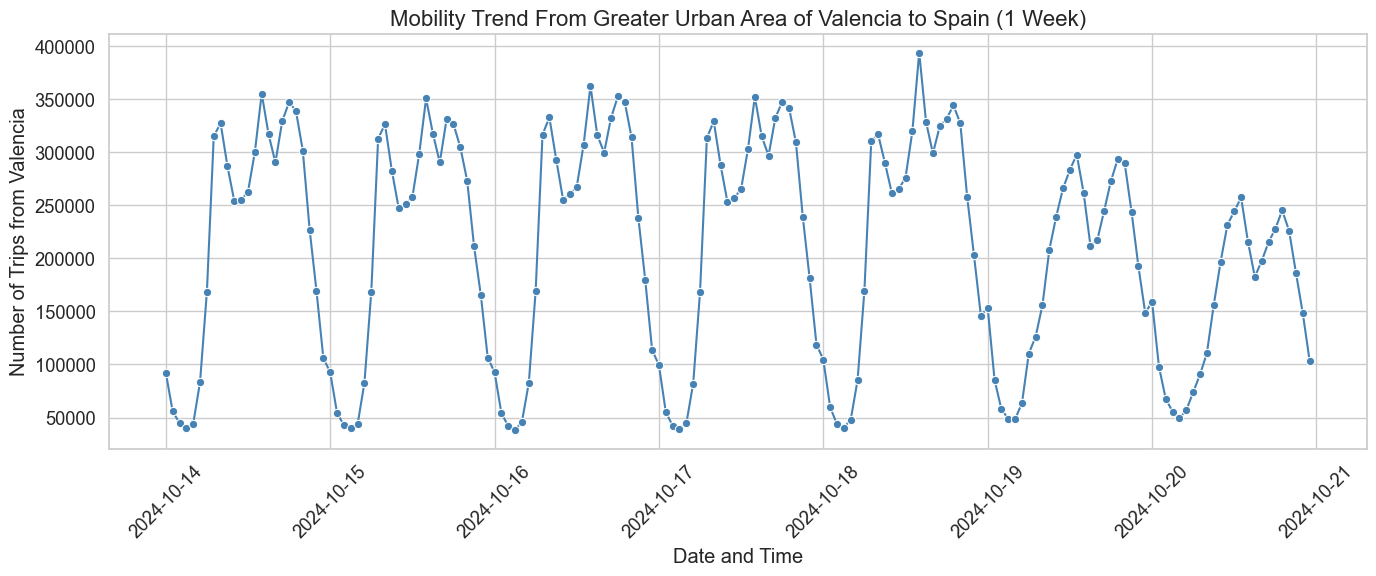

In [4]:
# Load the dataset
df = od

# Convert date to datetime and create a unified datetime index
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Sort values by time to ensure chronological order
df = df.sort_values(by='datetime')

# Set the plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot the time series
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='datetime', y='n_trips', marker='o', color='steelblue')

# Customize the plot
plt.title('Mobility Trend From Greater Urban Area of Valencia to Spain (1 Week)', fontsize=16)
plt.xlabel('Date and Time')
plt.ylabel('Number of Trips from Valencia')
plt.xticks(rotation=45)
plt.tight_layout()

--------------------------------------------------------------------------------------------------------------------------------------------------------------
A continuación, vamos a crear un bloque de código que calcule y visualice el **flujo neto de viajes** para el Área Urbana Grande (GAU) de Valencia, hora por hora, durante una semana.


        date  hour  viajes_salida  viajes_llegada  flujo_neto  \
0 2024-10-14     0      92346.349       92142.601    -203.748   
1 2024-10-14     1      55878.806       55929.285      50.479   
2 2024-10-14     2      44916.007       44889.317     -26.690   
3 2024-10-14     3      40058.216       40061.539       3.323   
4 2024-10-14     4      44157.816       42685.272   -1472.544   

             datetime  
0 2024-10-14 00:00:00  
1 2024-10-14 01:00:00  
2 2024-10-14 02:00:00  
3 2024-10-14 03:00:00  
4 2024-10-14 04:00:00  


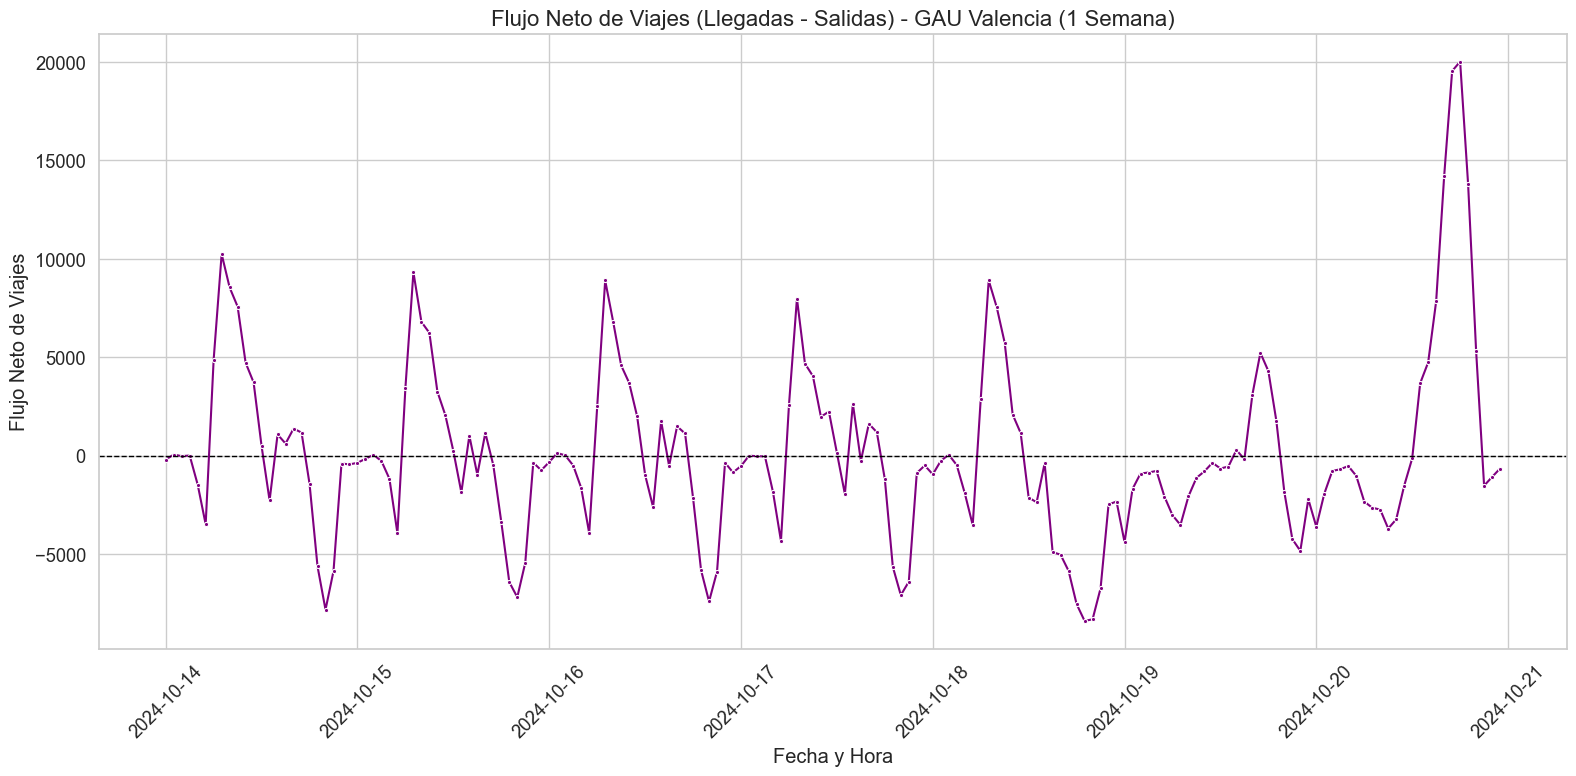

In [9]:
# Carga el parquet que ya tienes
od1 = pd.read_parquet('C:/Users/carlo/data/Viajes_GAU_2024-10-14_2024-10-20_v2.parquet')

# 1. CALCULAR SALIDAS (lo que ya tenías)
df_salidas = od1[od1['id_origin'] == 'GAU Valencia']
df_salidas = df_salidas.groupby(['date', 'hour'])['n_trips'].sum().reset_index()
df_salidas = df_salidas.rename(columns={'n_trips': 'viajes_salida'})

# 2. CALCULAR LLEGADAS (el paso nuevo)
df_llegadas = od1[od1['id_destination'] == 'GAU Valencia']
df_llegadas = df_llegadas.groupby(['date', 'hour'])['n_trips'].sum().reset_index()
df_llegadas = df_llegadas.rename(columns={'n_trips': 'viajes_llegada'})

# 3. COMBINAR LOS DATOS
# Unimos por fecha y hora
df_flujo = pd.merge(df_salidas, df_llegadas, on=['date', 'hour'], how='outer').fillna(0)

# 4. CALCULAR EL FLUJO NETO
df_flujo['flujo_neto'] = df_flujo['viajes_llegada'] - df_flujo['viajes_salida']

# 5. PREPARAR PARA GRAFICAR (como hiciste antes)
df_flujo['date'] = pd.to_datetime(df_flujo['date'])
df_flujo['datetime'] = df_flujo['date'] + pd.to_timedelta(df_flujo['hour'], unit='h')
df_flujo = df_flujo.sort_values(by='datetime')

print(df_flujo.head())

# 6. GRAFICAR
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Gráfico de Flujo Neto
ax = sns.lineplot(data=df_flujo, x='datetime', y='flujo_neto', color='purple', marker='.')
ax.axhline(0, ls='--', color='black', lw=1) # Línea en cero para ver el cruce

plt.title('Flujo Neto de Viajes (Llegadas - Salidas) - GAU Valencia (1 Semana)', fontsize=16)
plt.xlabel('Fecha y Hora')
plt.ylabel('Flujo Neto de Viajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El proceso que sigue es:

1.  **Cargar Datos:** Lee el archivo Parquet que contiene todos los micro-viajes de la semana.
2.  **Calcular Salidas:** Filtra todos los viajes que **originan** en `'GAU Valencia'` y los agrupa por fecha y hora, sumando el total de viajes (`viajes_salida`).
3.  **Calcular Llegadas:** Repite el proceso, pero filtrando todos los viajes que tienen como **destino** `'GAU Valencia'` (`viajes_llegada`).
4.  **Combinar y Calcular Flujo Neto:** Une las dos tablas (salidas y llegadas) por fecha y hora. Luego, crea la métrica principal calculando la diferencia: `flujo_neto = viajes_llegada - viajes_salida`.
5.  **Preparar Datos:** Crea una columna `datetime` unificada para que sirva como eje temporal continuo para el gráfico.
6.  **Visualizar:** Genera un gráfico de línea que muestra la evolución del `flujo_neto` a lo largo del tiempo.

### 📈 Lo que muestra el gráfico final:

El gráfico muestra el "pulso" de movilidad de Valencia, permitiendo ver si la ciudad está ganando o perdiendo población en un momento dado:

* **Valores > 0 (por encima de la línea 0):** Muestran las horas en que Valencia **recibe más gente de la que se va** (flujo de entrada neto). Esto es típico de las mañanas de días laborables, cuando la gente llega a trabajar o estudiar.
* **Valores < 0 (por debajo de la línea 0):** Muestran las horas en que **sale más gente de Valencia de la que entra** (flujo de salida neto). Esto es típico de las tardes, cuando la gente regresa a sus hogares (posiblemente a zonas residenciales o ciudades dormitorio).
* **La línea horizontal en 0:** Marca el punto de equilibrio exacto.

-------------------------------------------------
Ahora procederemos a hacer un Análisis Exploratorio de Datos para familiarizarnos más con la base de datos.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
print("Librerías cargadas.")

# --- Cargar Datos ---
# Asegúrate de que la ruta a tu archivo es correcta
file_path = 'C:/Users/carlo/data/Viajes_GAU_2024-10-14_2024-10-20_v2.parquet'
od = pd.read_parquet(file_path)

print(f"Datos cargados. {len(od)} filas encontradas.")

# --- Preparación de Datos ---

# 1. Convertir 'date' a formato datetime
od['date'] = pd.to_datetime(od['date'])

# 2. Crear 'datetime' completo para series temporales
od['datetime'] = od['date'] + pd.to_timedelta(od['hour'], unit='h')

# 3. Crear columnas de día
# 0 = Lunes, 6 = Domingo
od['day_of_week'] = od['date'].dt.dayofweek
od['day_name'] = od['date'].dt.day_name()

# 4. Crear tipo de día (Laboral vs Fin de Semana)
od['day_type'] = od['day_of_week'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Día Laboral')

# 5. Calcular longitud media por viaje (¡Métrica clave!)
# Añadimos 1e-6 para evitar dividir por cero si n_trips es 0
od['avg_trip_length_km'] = od['trips_total_length_km'] / (od['n_trips'] + 1e-6)

print("Columnas de análisis creadas. Vista previa de los datos preparados:")
print(od[['date', 'hour', 'day_name', 'day_type', 'n_trips', 'avg_trip_length_km']].head())

Librerías cargadas.
Datos cargados. 7272092 filas encontradas.
Columnas de análisis creadas. Vista previa de los datos preparados:
        date  hour day_name     day_type  n_trips  avg_trip_length_km
0 2024-10-14     0   Monday  Día Laboral    4.069            4.156057
1 2024-10-14     0   Monday  Día Laboral   10.071            4.981034
2 2024-10-14     0   Monday  Día Laboral   38.794           12.391890
3 2024-10-14     0   Monday  Día Laboral  223.927            2.830601
4 2024-10-14     0   Monday  Día Laboral   31.253            4.380731


Viajes día laboral vs día de descanso

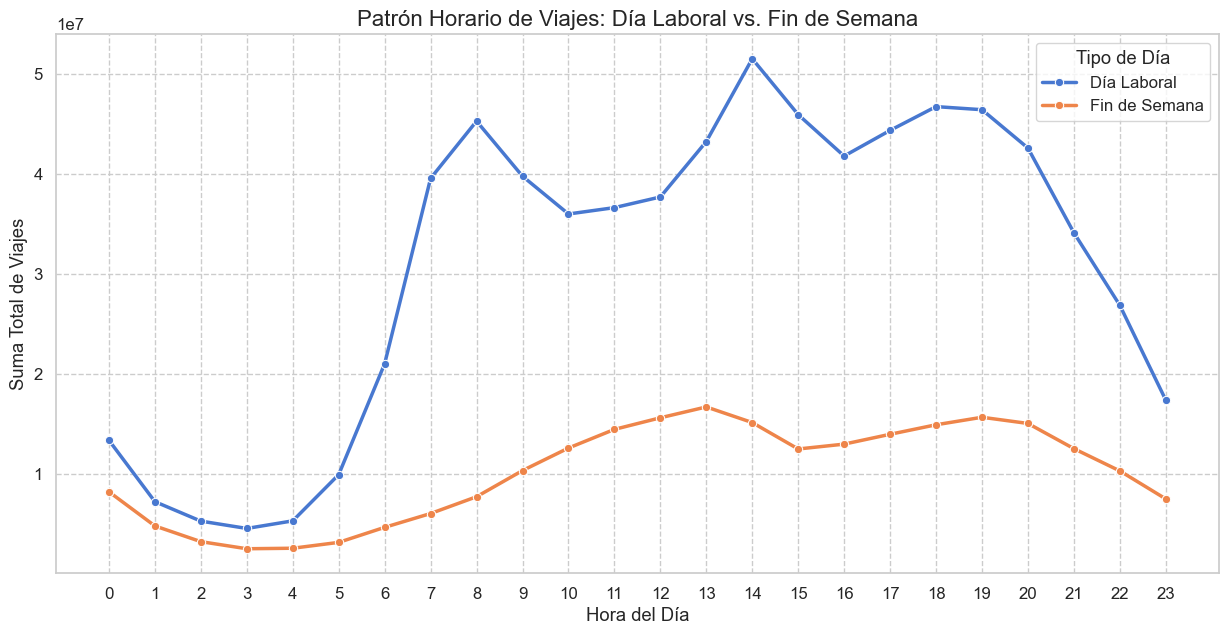

In [14]:
# Agrupar por tipo de día y hora
hourly_pattern = od.groupby(['day_type', 'hour'])['n_trips'].sum().reset_index()

# Graficar
plt.figure(figsize=(15, 7))
sns.lineplot(data=hourly_pattern, x='hour', y='n_trips', hue='day_type', marker='o', lw=2.5)

plt.title('Patrón Horario de Viajes: Día Laboral vs. Fin de Semana', fontsize=16)
plt.xlabel('Hora del Día')
plt.ylabel('Suma Total de Viajes')
plt.xticks(range(0, 24)) # Marcar cada hora
plt.legend(title='Tipo de Día')
plt.grid(True, which='both', linestyle='--')
plt.show()

¿Qué zonas tienen más tránsito?

C:\Users\carlo\AppData\Local\Temp\ipykernel_16888\1032015431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origins.values, y=top_origins.index, ax=ax1, palette='viridis')
C:\Users\carlo\AppData\Local\Temp\ipykernel_16888\1032015431.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.values, y=top_destinations.index, ax=ax2, palette='plasma')


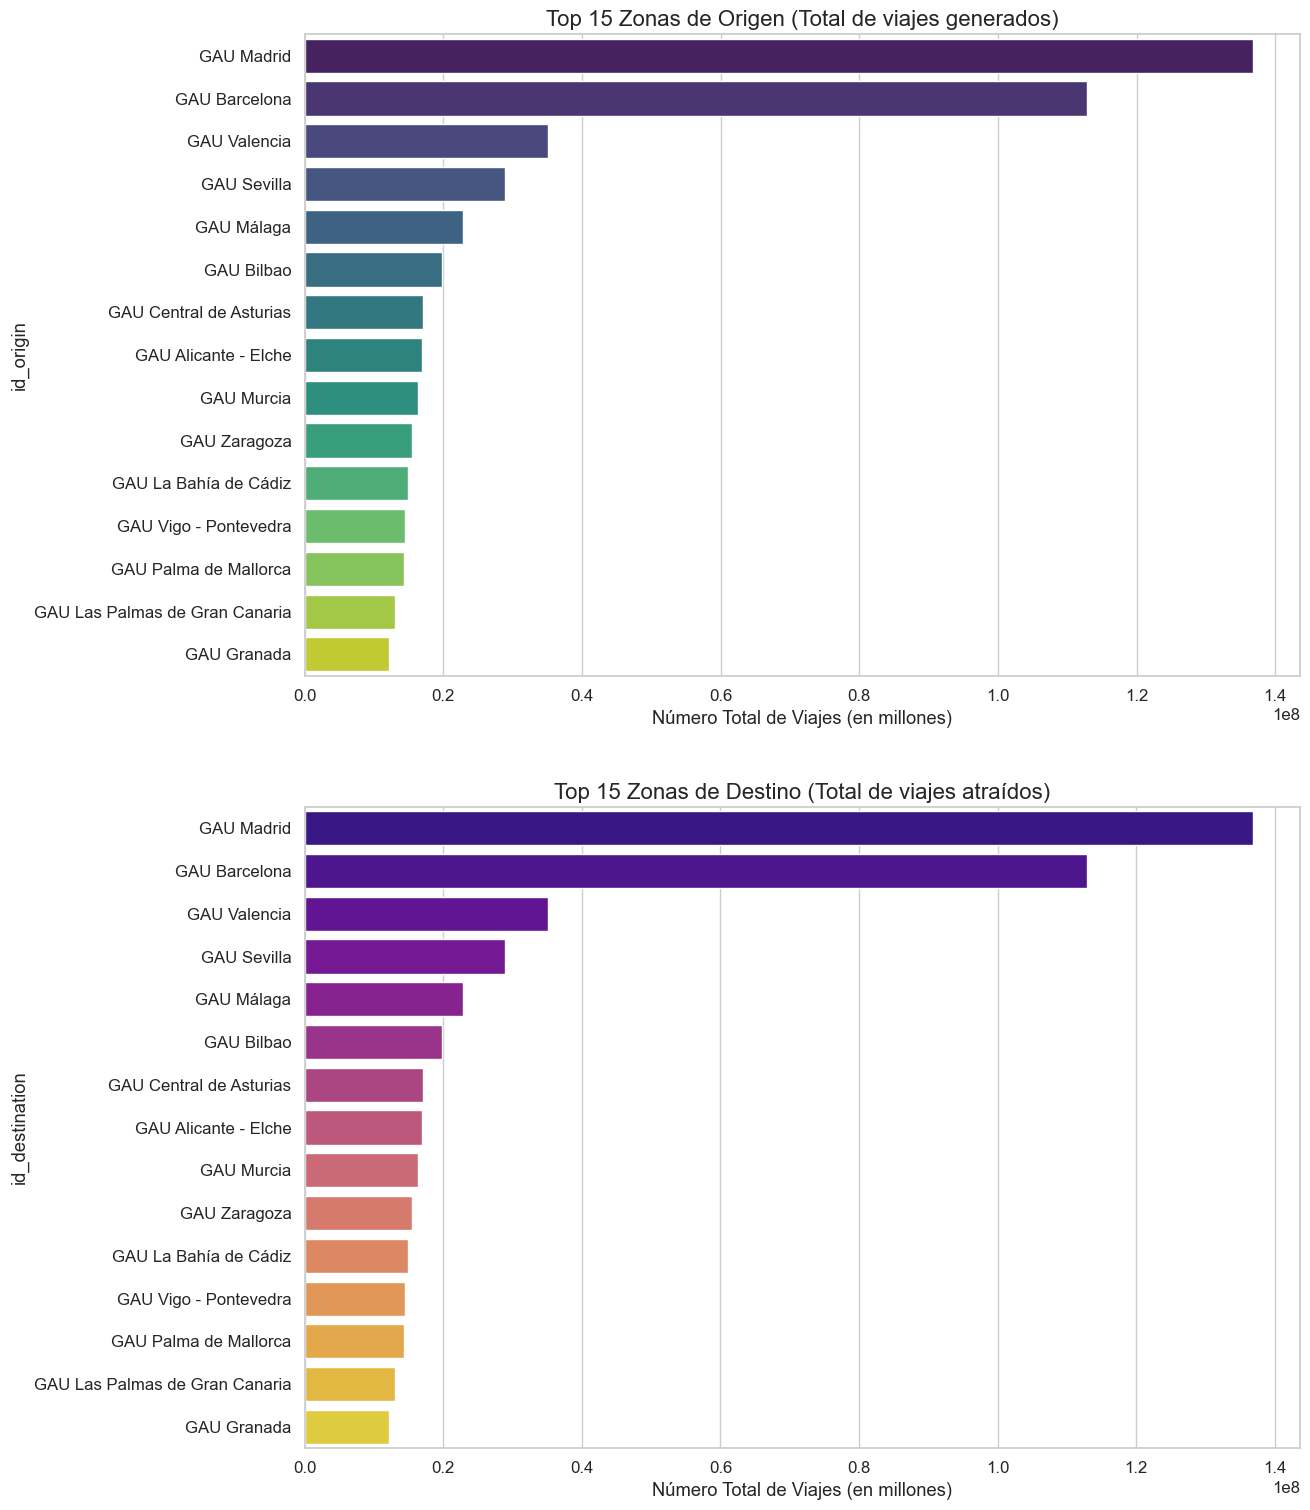

In [15]:
# Agrupar por 'id_origin' y sumar 'n_trips'
top_origins = od.groupby('id_origin')['n_trips'].sum().sort_values(ascending=False).head(15)

# Agrupar por 'id_destination' y sumar 'n_trips'
top_destinations = od.groupby('id_destination')['n_trips'].sum().sort_values(ascending=False).head(15)

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Gráfico de Top Orígenes
sns.barplot(x=top_origins.values, y=top_origins.index, ax=ax1, palette='viridis')
ax1.set_title('Top 15 Zonas de Origen (Total de viajes generados)', fontsize=16)
ax1.set_xlabel('Número Total de Viajes (en millones)')

# Gráfico de Top Destinos
sns.barplot(x=top_destinations.values, y=top_destinations.index, ax=ax2, palette='plasma')
ax2.set_title('Top 15 Zonas de Destino (Total de viajes atraídos)', fontsize=16)
ax2.set_xlabel('Número Total de Viajes (en millones)')

plt.tight_layout(pad=3.0)
plt.show()

Top viajes entre zonas distintas

In [17]:
# Crear una columna con el par O-D
od['od_pair'] = od['id_origin'] + ' -> ' + od['id_destination']

# 2. Top Pares (Excluyendo viajes internos)
od_no_internal = od[od['id_origin'] != od['id_destination']]
top_pairs_external = od_no_internal.groupby('od_pair')['n_trips'].sum().sort_values(ascending=False).head(15)
print("--- Top 15 Conexiones (SIN viajes internos) ---")
print(top_pairs_external)

--- Top 15 Conexiones (SIN viajes internos) ---
od_pair
GAU Gran Canaria Sur -> GAU Las Palmas de Gran Canaria    622814.407
GAU Las Palmas de Gran Canaria -> GAU Gran Canaria Sur    618445.173
GAU La Costa Blanca -> GAU Alicante - Elche               472541.960
GAU Alicante - Elche -> GAU La Costa Blanca               471286.669
38035_AM -> GAU Tenerife Sur                              379936.764
GAU Tenerife Sur -> 38035_AM                              378161.201
GAU Guadalajara -> GAU Madrid                             374749.273
GAU Madrid -> GAU Guadalajara                             374073.557
31076_AM -> GAU Pamplona                                  372108.326
GAU Pamplona -> 31076_AM                                  370747.025
04102 -> GAU Roquetas de Mar                              307119.025
GAU Roquetas de Mar -> 04102                              306341.964
GAU La Costa del Sol -> GAU Málaga                        299202.079
GAU Málaga -> GAU La Costa del Sol             

Análisis Exploratorio de Datos para ver la distribución de los recorridos. (Media = 70km)

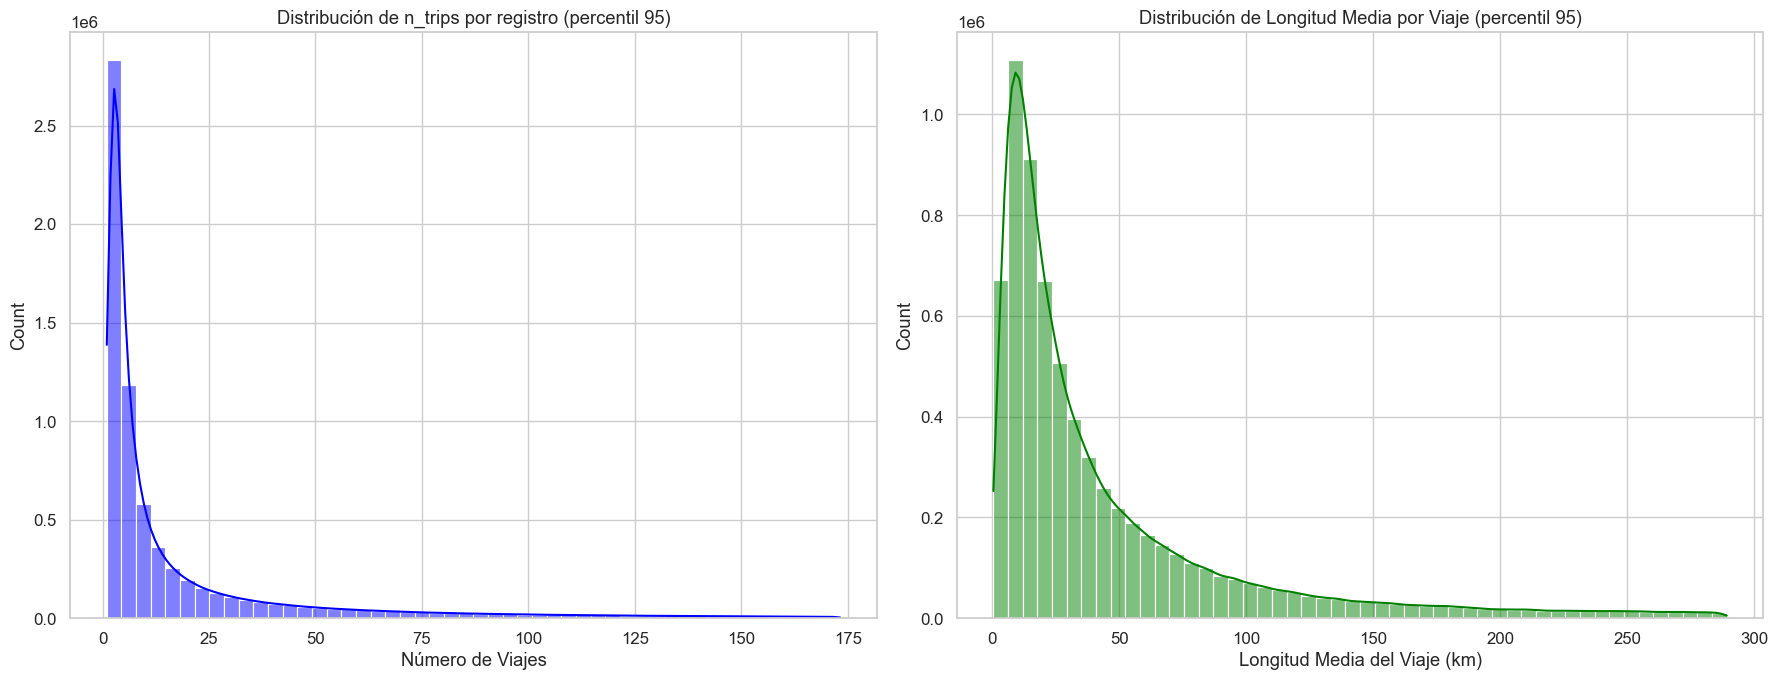


Longitud media de todos los viajes (promedio): 70.09 km


In [18]:
# Filtrar valores extremos para una mejor visualización (el 95% de los datos)
trips_filtered = od[od['n_trips'] < od['n_trips'].quantile(0.95)]
length_filtered = od[od['avg_trip_length_km'] < od['avg_trip_length_km'].quantile(0.95)]

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Histograma de n_trips (filtrado)
sns.histplot(trips_filtered['n_trips'], bins=50, kde=True, ax=ax1, color='blue')
ax1.set_title('Distribución de n_trips por registro (percentil 95)')
ax1.set_xlabel('Número de Viajes')

# Histograma de longitud media (filtrado)
sns.histplot(length_filtered['avg_trip_length_km'], bins=50, kde=True, ax=ax2, color='green')
ax2.set_title('Distribución de Longitud Media por Viaje (percentil 95)')
ax2.set_xlabel('Longitud Media del Viaje (km)')

plt.tight_layout()
plt.show()

# También es útil ver la media de esta nueva métrica
print(f"\nLongitud media de todos los viajes (promedio): {od['avg_trip_length_km'].mean():.2f} km")